Matplotlib fundamentals

In [1]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head


<bound method NDFrame.head of       Year  Month        Make  Quantity   Pct
0     2007      1      Toyota      2884  22.7
1     2007      1  Volkswagen      2521  19.9
2     2007      1     Peugeot      1029   8.1
3     2007      1        Ford       870   6.9
4     2007      1       Volvo       693   5.5
...    ...    ...         ...       ...   ...
4372  2017      1     Nilsson         3   0.0
4373  2017      1    Maserati         2   0.0
4374  2017      1     Ferrari         1   0.0
4375  2017      1       Smart         1   0.0
4376  2017      1   Ssangyong         1   0.0

[4377 rows x 5 columns]>

EDA_ Exploratory data analysis


In [2]:
df.shape

(4377, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [6]:
df.head(20)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [15]:
import duckdb

# brand and total quantity for each brand
df_quantity_brand = duckdb.query("""
             SELECT make AS brand,SUM(quantity) AS total_quantity
             FROM df
             GROUP BY make
             ORDER BY total_quantity DESC
             """).df()
df_quantity_brand.head()

,brand,total_quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


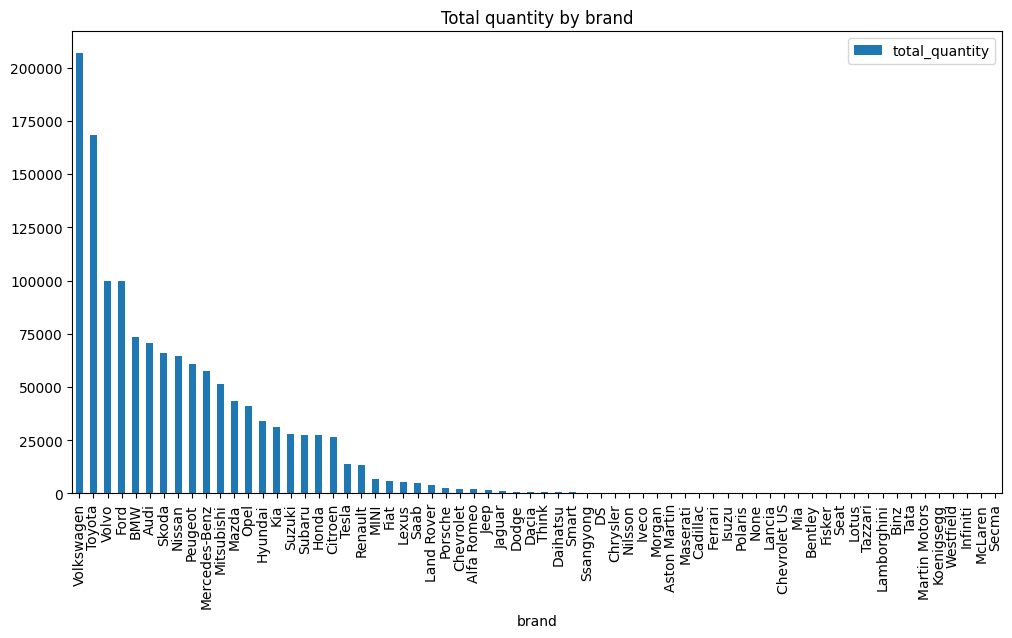

In [17]:
df_quantity_brand.plot(kind="bar", x="brand", y="total_quantity", title="Total quantity by brand", figsize=(12, 6), legend=True, fontsize=10)
import matplotlib.pyplot as plt

## plot top 5 most popular brans

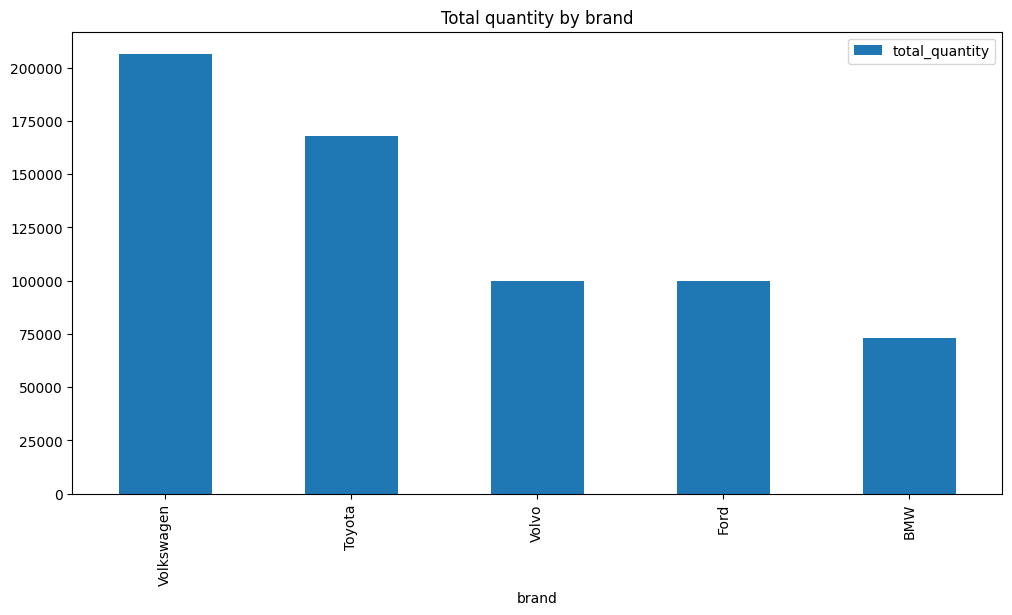

In [21]:
df_quantity_brand.head().plot(kind="bar", x="brand", y="total_quantity", title="Total quantity by brand", figsize=(12, 6), legend=True, fontsize=10)
import matplotlib.pyplot as plt

#This iloc will show bar chart just in the limited area that we say, it slices the chart

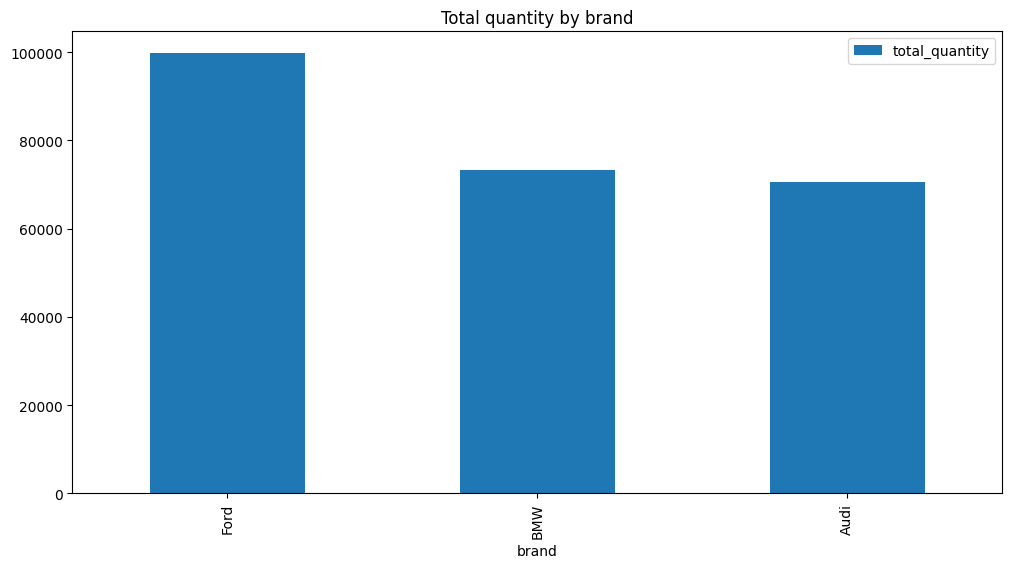

In [22]:
df_quantity_brand.iloc[3:6].plot(kind="bar", x="brand", y="total_quantity", title="Total quantity by brand", figsize=(12, 6), legend=True, fontsize=10)
import matplotlib.pyplot as plt

###Matplotlib bar

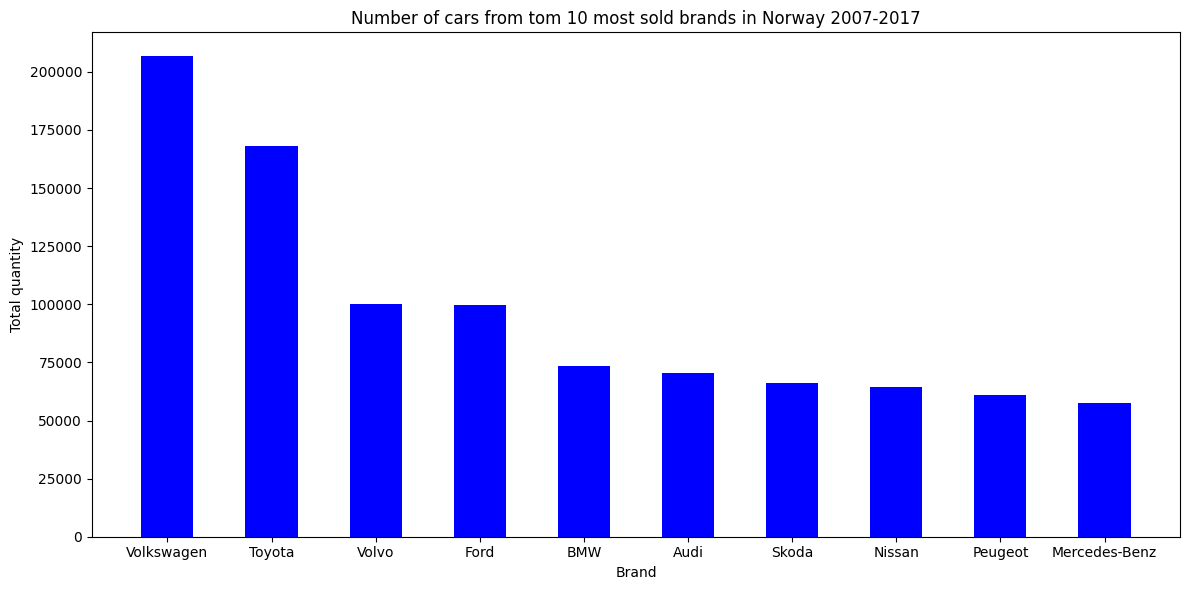

In [32]:
import matplotlib.pyplot as plt
df_quantity_brand_top10 = df_quantity_brand.iloc[:10]
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    x=df_quantity_brand_top10["brand"],
    height=df_quantity_brand_top10["total_quantity"],
    width=0.5,
    color="blue",
)
ax.set(title="Number of cars from tom 10 most sold brands in Norway 2007-2017", xlabel="Brand", ylabel="Total quantity")
fig.tight_layout()

fig.savefig("figures/bars_top_10_cars.png")



In [26]:
df_quantity_brand_top10["total_quantity"]

0    206669.0
1    168177.0
2     99937.0
3     99713.0
4     73315.0
5     70475.0
6     66007.0
7     64535.0
8     61033.0
9     57557.0
Name: total_quantity, dtype: float64

##LINE chart

In [46]:
df_quantity_year = duckdb.query("""
        SELECT year, SUM(quantity) AS total_quantity
        FROM df
        GROUP BY year
        ORDER BY year ASC""").df().set_index("Year")
df_quantity_year

,total_quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


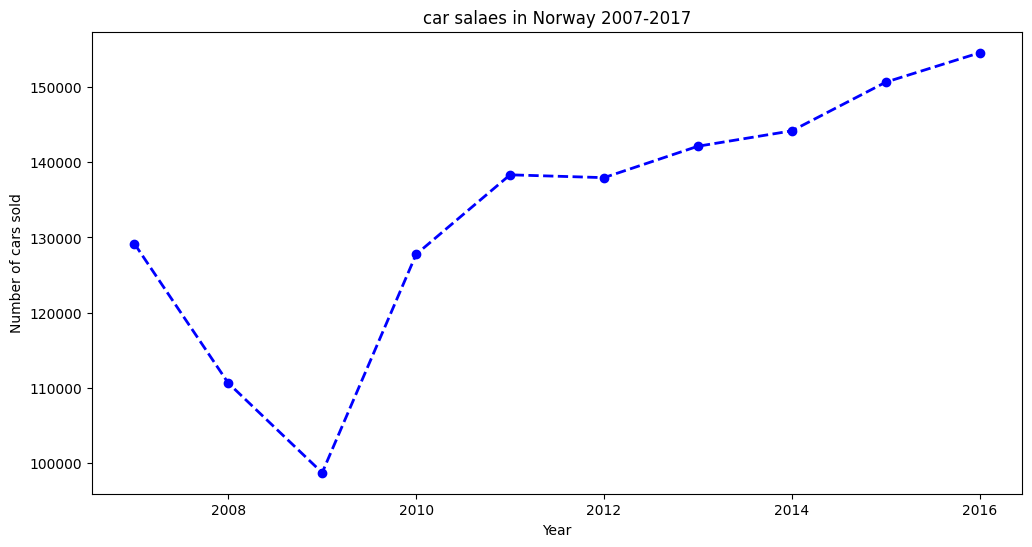

In [56]:
ax = df_quantity_year.iloc[:-1].plot(title="car salaes in Norway 2007-2017",
                                 xlabel="Year", ylabel="Number of cars sold", 
                                 figsize=(12, 6), 
                                 legend=False, 
                                 fontsize=10,
                                 style="--o",
                                 linewidth=2,
                                 color="blue")
ax.legend().remove()
fig = ax.get_figure()
fig.savefig("figures/line_cars.png")